# Identify key users
Identifying key users on social media is important to mitigate the effect of misinformation.
* Malicious users
* Bots
* Persuaders
* Trolls

In [44]:
!pip install plotly==4.14.3

Processing c:\users\lucas.carneiro\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56\retrying-1.3.3-py3-none-any.whl


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils
from utils import preprocess
import time
import plotly.express as px

%matplotlib inline
sns.set(style="darkgrid")

# Load data

In [15]:
df = pd.read_csv('data/2018/fakeWhatsApp.BR_2018.csv')
# sorting by time
def custom_time(data,hora):
    string = data + " " + hora
    return string
df['timestamp'] = df.apply(lambda x: custom_time(x['date'],x['hour']),axis=1)
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%m/%y %H:%M')
df.sort_values(by='timestamp',inplace=True)
df['viral'] = [1 if (mis!=-1 or sh > 1) else 0 for mis, sh in zip(df['misinformation'], df['shares'])]

C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
# # get user data from message data
# start = time.time()
# df_users = utils.get_top_users(df,None)
# df_users.to_csv('data/2018/users.csv',index=False)
# end = time.time()
# print((end-start)/60)

In [17]:
# users
df_users = pd.read_csv('data/2018/users.csv')

# credibility score with laplace smoothing
df_users['credibility'] = 1-df_users['misinformation']/(df_users['virals']+1)
df_users.head(5)

,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
0,-3818310068976662355,1,4396,3742,0.851228,654,0.148772,24,0.005460,609,...,153,672588,153,3672,10,153,1530,0.002275,0.416667,0.600000
1,5782050016593913959,11,2332,972,0.416810,1360,0.583190,227,0.097341,363,...,1710,498161,1631,48057,58,1506,11907,0.024871,0.255507,0.745614
2,-2072140886659020977,3,2064,948,0.459302,1116,0.540698,243,0.117733,94,...,534,391490,534,46414,85,534,15800,0.041182,0.349794,0.651639
3,2839535797075678550,5,2020,1587,0.785644,433,0.214356,116,0.057426,258,...,895,644390,895,30154,25,866,6179,0.012376,0.215517,0.786325
4,170916900626840870,1,1810,828,0.457459,982,0.542541,111,0.061326,24,...,153,276930,153,16983,69,153,10557,0.038122,0.621622,0.383929


In [18]:
print('total users: ', len(df_users))

total users:  5364


# Distributions of variables

In [19]:
def outlier_iqr(s):
    q3 = s.quantile(0.75)
    q1 = s.quantile(0.25)
    out = q3+1.5*(q3-q1)
    return out

def outlier(s, percentile = 0.95):
    out = s.quantile(percentile)
    return out

# Number of messages (activity)

In [20]:
print('raw number of messages')

print(df_users['number_of_messages'].describe())

msg_outlier = outlier(df_users['number_of_messages'])
print('outliers: ', msg_outlier)

raw number of messages
count    5364.000000
mean       52.684750
std       138.060355
min         1.000000
25%         3.000000
50%        13.000000
75%        45.000000
max      4396.000000
Name: number_of_messages, dtype: float64
outliers:  232.84999999999945


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


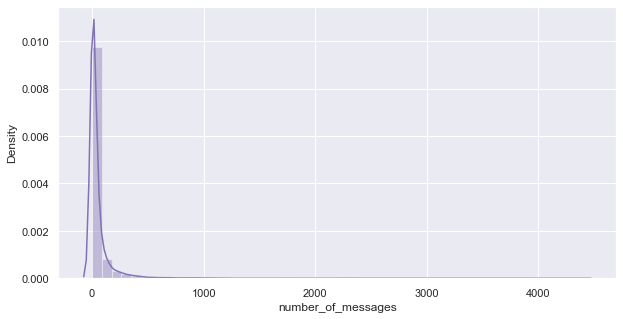

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(df_users['number_of_messages'], kde = True, color = 'C4')
plt.show()

In [22]:
print('users with low activity')
df_users[df_users['number_of_messages'] < df_users['number_of_messages'].quantile(0.25)]

users with low activity


,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
4286,8336488125908935379,1,2,2,1.0,0,0.0,0,0.0,0,...,89,178,0,0,0,0,0,0.0,0.0,1.0
4287,6875491021077833123,1,2,0,0.0,2,1.0,0,0.0,0,...,92,184,0,0,0,0,0,0.0,0.0,1.0
4288,-3336310125646763359,1,2,0,0.0,2,1.0,0,0.0,0,...,75,150,0,0,0,0,0,0.0,0.0,1.0
4289,-2527878442120488955,1,2,2,1.0,0,0.0,0,0.0,0,...,140,280,0,0,0,0,0,0.0,0.0,1.0
4290,-7122587308028551890,1,2,0,0.0,2,1.0,0,0.0,0,...,166,332,0,0,0,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5359,-3685511676029813622,1,1,0,0.0,1,1.0,0,0.0,0,...,166,166,0,0,0,0,0,0.0,0.0,1.0
5360,-3687281691650946329,1,1,0,0.0,1,1.0,0,0.0,0,...,188,188,0,0,0,0,0,0.0,0.0,1.0
5361,4870300454101875011,1,1,1,1.0,0,0.0,0,0.0,0,...,57,57,0,0,0,0,0,0.0,0.0,1.0
5362,7020988212245908273,1,1,1,1.0,0,0.0,0,0.0,0,...,91,91,0,0,0,0,0,0.0,0.0,1.0


In [79]:
print('users with high activity (95 percentile)')
df_users[df_users['number_of_messages'] > df_users['number_of_messages'].quantile(0.95)]

users with high activity (95 percentile)


,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility,misinformer,superspreader
0,-3818310068976662355,1,4396,3742,0.851228,654,0.148772,24,0.005460,609,...,153,3672,10,153,1530,0.002275,0.416667,0.600000,non_misinformer,non_superspreader
1,5782050016593913959,11,2332,972,0.416810,1360,0.583190,227,0.097341,363,...,1631,48057,58,1506,11907,0.024871,0.255507,0.745614,misinformer,superspreader
2,-2072140886659020977,3,2064,948,0.459302,1116,0.540698,243,0.117733,94,...,534,46414,85,534,15800,0.041182,0.349794,0.651639,misinformer,superspreader
3,2839535797075678550,5,2020,1587,0.785644,433,0.214356,116,0.057426,258,...,895,30154,25,866,6179,0.012376,0.215517,0.786325,misinformer,superspreader
4,170916900626840870,1,1810,828,0.457459,982,0.542541,111,0.061326,24,...,153,16983,69,153,10557,0.038122,0.621622,0.383929,misinformer,superspreader
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,5045562863966605913,1,235,155,0.659574,80,0.340426,25,0.106383,1,...,270,6750,17,270,4590,0.072340,0.680000,0.346154,non_misinformer,superspreader
265,-612810256248025955,1,234,68,0.290598,166,0.709402,11,0.047009,0,...,273,3003,6,273,1638,0.025641,0.545455,0.500000,non_misinformer,non_superspreader
266,7376637358209551663,1,233,71,0.304721,162,0.695279,35,0.150215,0,...,97,3395,22,97,2134,0.094421,0.628571,0.388889,misinformer,non_superspreader
267,4305486479648129759,5,233,171,0.733906,62,0.266094,97,0.416309,79,...,1116,23660,13,1116,3016,0.055794,0.134021,0.867347,non_misinformer,non_superspreader


In [24]:
print('analyse only active users')
df_active_users = df_users[df_users['number_of_messages'] > df_users['number_of_messages'].quantile(0.50)] 

analyse only active users


## Analysis functions

In [28]:
def messages_by_key_users(user, key_users):
    if user in key_users:
        return True
    else:
        return False
    
def group_misinformation(variable, outlier_th, group_name):
    df_group = df_users[df_users[variable] >= outlier_th]
    users_in_group = set(df_group['id'])

    # misinformation
    total_mis = len(df[df['misinformation']==1])
    print('total misinformation: ', total_mis)

    mask = []
    for u in df['id']:
        mask.append(u in users_in_group)  

    df_messages_from_group = df[mask]
    df_misinformation_from_group = df_messages_from_group[df_messages_from_group['misinformation']==1]

    print('total users:',len(df_users))
    print('total {c}: {a:1d} ({b:.1f}%)'.format(a = len(users_in_group), 
                                                b = len(users_in_group)*100/len(df_users), 
                                                c = group_name))
    
    print('proportion of misinformation sent by {b} users: {a:.1f}%'.format(a = len(df_misinformation_from_group)*100/total_mis, 
                                                                            b = group_name))
    
def describe_group(variable, group_name, c = 'C0'):
    print(df_active_users[variable].describe())
    outliers = outlier(df_active_users[variable])
    print('outliers threshold: ', outliers)    
    plt.figure(figsize=(10,5))
    sns.distplot(df_active_users[variable], kde = True, color = c)
    plt.show()
    group = df_active_users[df_active_users[variable] > outliers]
    users_in_group = set(group['id'])
    
    group_misinformation(variable, outliers, group_name)
    
    
    return group, users_in_group, outliers

def print_sample_messages(df_group, sorting = 'number_of_messages', user=0, n_sample = 10):
    df_group.sort_values(by=sorting, ascending=False, inplace = True)
    
    for l in list(df[(df['id']==df_group['id'].iloc[user]) & (df['midia']==0)]['text'].sample(n_sample)):
        print(l)

# Influencers
Users with high degree of conectivity

count    2633.000000
mean      240.422712
std       162.763890
min         3.000000
25%       140.000000
50%       270.000000
75%       302.000000
max      1710.000000
Name: degree_centrality, dtype: float64
outliers threshold:  494.0


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


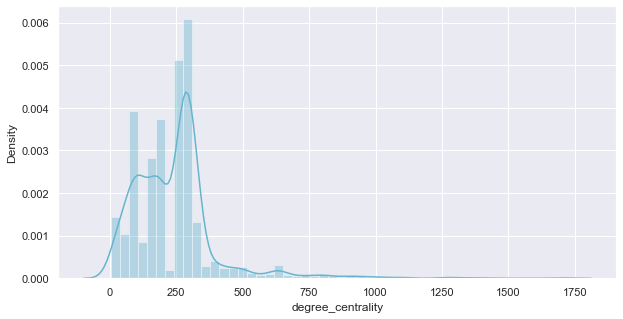

total misinformation:  11412
total users: 5364
total influencers: 170 (3.2%)
proportion of misinformation sent by influencers users: 14.9%


,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
1,5782050016593913959,11,2332,972,0.416810,1360,0.583190,227,0.097341,363,...,1710,498161,1631,48057,58,1506,11907,0.024871,0.255507,0.745614
2,-2072140886659020977,3,2064,948,0.459302,1116,0.540698,243,0.117733,94,...,534,391490,534,46414,85,534,15800,0.041182,0.349794,0.651639
3,2839535797075678550,5,2020,1587,0.785644,433,0.214356,116,0.057426,258,...,895,644390,895,30154,25,866,6179,0.012376,0.215517,0.786325
10,620937769575483159,8,1103,872,0.790571,231,0.209429,60,0.054397,177,...,1418,177196,1002,9903,23,1002,3531,0.020852,0.383333,0.622951
13,-8623724588738162216,3,1020,279,0.273529,741,0.726471,174,0.170588,155,...,782,261182,782,44858,100,782,25954,0.098039,0.574713,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,8290159486855748515,3,18,16,0.888889,2,0.111111,1,0.055556,1,...,800,5316,326,326,0,0,0,0.000000,0.000000,1.000000
2325,-8401221142032315727,2,18,4,0.222222,14,0.777778,1,0.055556,0,...,634,5814,326,326,0,0,0,0.000000,0.000000,1.000000
2364,-3873778220002154255,3,17,5,0.294118,12,0.705882,1,0.058824,0,...,639,3670,308,308,0,0,0,0.000000,0.000000,1.000000
2492,5121206937748661049,4,15,7,0.466667,8,0.533333,4,0.266667,5,...,739,2869,739,739,0,0,0,0.000000,0.000000,1.000000


In [29]:
df_influencers, influencers, degree_outlier = describe_group('degree_centrality', 'influencers', c = 'C9')
df_influencers

In [30]:
print_sample_messages(df_influencers, sorting = 'number_of_messages', user=1, n_sample = 10)

Alguém sabe se vai ser transmitido via YouTube a entrevista do Bolsonaro no jornal nacional ???
RR Soares com Bolsonaro.
https://youtu.be/vG7c0l8kGL0
Haddad no terreiro kkkk
Diz que até um pé na bunda faz você ir pra frente. Imagina uma facada.
Acho que nós lugares que tiver desfile ou outro manifesto do 7 setembro, devíamos ir com a camisa do mito, além de adesivos bandeira etc.... não acham????
Bolsonaro explicando de como você pode ir de camiseta 👆👆
O Banker esquerdopata não está resistindo a artilharia do Bolsonaro
O Senhor abrirá uma nova janela. O Senhor abala a economia. Ele transformará o Brasil com seu povo em oração e joelhos no chão.
https://renovamidia.com.br/dono-do-vox-populi-e-investigado-pela-pf-e-colunista-da-carta-capital/ 
*Marcos é colunista da Carta Capital, revista acusada na Lava Jato de receber mais de R$ 8 milhões da Odebrecht para favorecer Lula junto à opinião pública, conforme reportado pelo O Antagonista.*


<ipython-input-28-d191e0035341>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group.sort_values(by=sorting, ascending=False, inplace = True)


# Possible Bots
Users with suspicious patterns of activity

### Viral ratio

count    2633.000000
mean        0.080015
std         0.093791
min         0.000000
25%         0.012048
50%         0.057143
75%         0.117647
max         1.000000
Name: viral_ratio, dtype: float64
outliers threshold:  0.24487025948103802


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


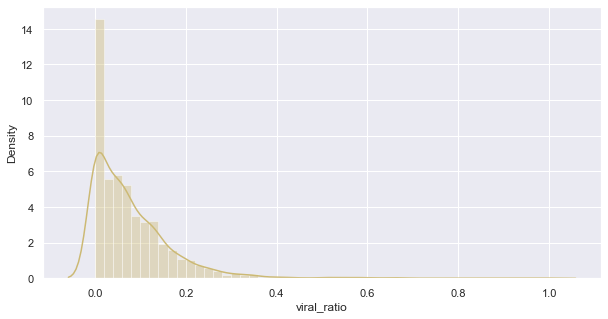

total misinformation:  11412
total users: 5364
total propagandists: 468 (8.7%)
proportion of misinformation sent by propagandists users: 14.8%


,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
16,-9166534760459654877,8,964,640,0.663900,324,0.336100,569,0.590249,497,...,1260,169073,1260,97306,111,1260,18523,0.115145,0.195079,0.805263
18,-4365731339186281047,7,951,406,0.426919,545,0.573081,260,0.273396,265,...,1266,180079,1266,49941,135,1266,25971,0.141956,0.519231,0.482759
39,-5426274422942733548,6,712,431,0.605337,281,0.394663,283,0.397472,178,...,1080,150659,1080,58364,141,1080,28601,0.198034,0.498233,0.503521
70,5428835759879898822,7,530,354,0.667925,176,0.332075,182,0.343396,120,...,1336,146787,1336,44646,53,1336,12711,0.100000,0.291209,0.710383
73,2660222405768274296,3,520,193,0.371154,327,0.628846,129,0.248077,95,...,569,99029,569,23686,21,569,3841,0.040385,0.162791,0.838462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,-3649372505195215632,3,15,15,1.000000,0,0.000000,10,0.666667,7,...,438,2287,438,1462,0,0,0,0.000000,0.000000,1.000000
2553,-1262571921909839756,1,14,7,0.500000,7,0.500000,5,0.357143,0,...,148,2072,148,740,5,148,740,0.357143,1.000000,0.166667
2591,-632311808282765422,3,14,13,0.928571,1,0.071429,7,0.500000,4,...,617,3682,617,1400,0,0,0,0.000000,0.000000,1.000000
2603,2841547953877816965,1,14,11,0.785714,3,0.214286,9,0.642857,5,...,202,2828,202,1818,1,202,202,0.071429,0.111111,0.900000


In [31]:
df_propagandists, propagandists, viral_ratio_outlier = describe_group('viral_ratio', 'propagandists', c = 'C8')
df_propagandists

In [32]:
print_sample_messages(df_propagandists, sorting = 'number_of_messages', user=1, n_sample = 10)

Bando de canalhas e corruptos. Vão ferver no mar do inferno. 🙌🙌
2o Turno: você foi selecionado para participar da pesquisa presidencial de 2oturno do Ibope, responda no link a seguir:

https://ibope.pesquisabrasil.site
https://youtu.be/UsLfyYKN-Q4
Vamos relembrar tudo que aconteceu com o Brasil nos últimos anos ☝☝
https://youtu.be/FgpYrXN00Sw
Fazenda Tamboril  presta homenagem ao mito
50 hectares com o rosto de Bolsonaro
Goiatuba-Go
DEVERIA SER OBRIGATÓRIO AS MULHERES ASSISTIREM ESSE VÍDEO ☝Quando chamam Bolsonario de HOMOFÓBICO é porque ele lutou contra isso. Veja e se você concordar pode chamar do que quiser.
VEJA O QUE ROLOU NO IX SEMINÁRIO LGBT:
É bem pior que uma cartilha que o Bolsonaro mostrou!
Brasil Paralelo liberou a série Teatro das Tesouras ☝☝Assistam e relembram as eleições passadas. Vale a pena assistir tudo o que já passamos.
https://youtu.be/AZb3XtvBTt8
https://youtu.be/BUCIGd7hFGA


<ipython-input-28-d191e0035341>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group.sort_values(by=sorting, ascending=False, inplace = True)


### Midia ratio

count    2633.000000
mean        0.451095
std         0.240415
min         0.000000
25%         0.263158
50%         0.462687
75%         0.640719
max         1.000000
Name: midia_ratio, dtype: float64
outliers threshold:  0.8278017241379311


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


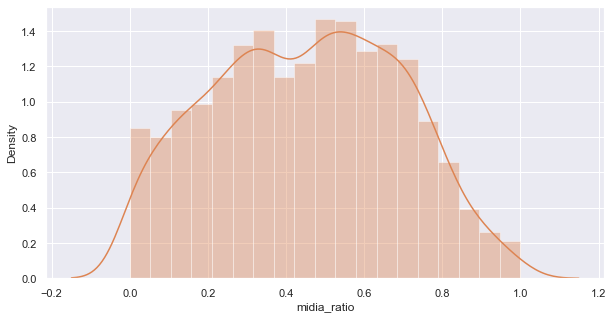

total misinformation:  11412
total users: 5364
total midia sharers: 702 (13.1%)
proportion of misinformation sent by midia sharers users: 1.3%


,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
78,-219310841950453287,1,484,74,0.152893,410,0.847107,13,0.026860,1,...,202,97768,202,2626,9,202,1818,0.018595,0.692308,0.357143
156,-6751793192245753920,2,335,46,0.137313,289,0.862687,7,0.020896,8,...,354,62958,188,1316,2,188,376,0.005970,0.285714,0.750000
262,2456757965557025813,4,237,33,0.139241,204,0.860759,17,0.071730,11,...,739,47556,739,2927,13,739,2111,0.054852,0.764706,0.277778
356,-3459365403520904542,3,181,21,0.116022,160,0.883978,8,0.044199,1,...,353,45308,270,2160,3,270,810,0.016575,0.375000,0.666667
359,4173679385744376,1,181,16,0.088398,165,0.911602,6,0.033149,0,...,25,4525,25,150,3,25,75,0.016575,0.500000,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,-2467811906975488182,1,14,1,0.071429,13,0.928571,0,0.000000,0,...,273,3822,0,0,0,0,0,0.000000,0.000000,1.000000
2597,7074938153153379136,1,14,0,0.000000,14,1.000000,0,0.000000,0,...,11,154,0,0,0,0,0,0.000000,0.000000,1.000000
2611,-522115093907410041,1,14,2,0.142857,12,0.857143,1,0.071429,0,...,188,2632,188,188,1,188,188,0.071429,1.000000,0.500000
2619,-3009142299518862577,1,14,1,0.071429,13,0.928571,1,0.071429,0,...,202,2828,202,202,0,0,0,0.000000,0.000000,1.000000


In [34]:
df_midia_sharers, midia_sharers, midia_ratio_outlier = describe_group('midia_ratio', 'midia sharers', c = 'C1')
df_midia_sharers


In [35]:
print_sample_messages(df_midia_sharers, sorting = 'number_of_messages', user=1, n_sample = 10)

👍🏻
Isso é ótimo 😂😂😂
https://www.google.com.br/amp/s/veja.abril.com.br/blog/reinaldo/8220-kit-gay-8221-preparado-pela-gestao-de-fernando-haddad-na-educacao-foi-o-primeiro-a-propor-8220-transgeneras-8221-em-banheiro-feminino-esse-rapaz-sempre-dando-boas-ideias-8230/amp/
A morte da velha política no Brasil, comentário de Alexandre Garcia.👇🏻👇🏻👇🏻
Pode crer
https://youtu.be/URwW2Mc_Rek
https://youtu.be/gHGUmEV3Ah0 Essa derrota ainda foi pra igreja tentar enganar os trouxas.
Grupo PTista, entre e bagunce!!!!
https://www.instagram.com/p/BonA8Ayh5vL/?utm_source=ig_share_sheet&igshid=1iucwk61st6p9
https://youtu.be/p_Z3TC1xKbM


<ipython-input-28-d191e0035341>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group.sort_values(by=sorting, ascending=False, inplace = True)


# Temporal pattern
Messages by day

In [36]:
df_users[['days_active', 'daily_mean', 'daily_std',
       'daily_median', 'daily_95', 'daily_outliers']].describe()

,days_active,daily_mean,daily_std,daily_median,daily_95,daily_outliers
count,5364.000000,5364.000000,4217.000000,5364.000000,5364.000000,5364.000000
mean,33.325130,2.108895,2.777722,1.369500,5.480397,1.566555
std,30.039501,5.031530,4.656666,4.838491,9.766039,1.458944
min,1.000000,0.027523,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.403762,0.707107,0.000000,1.000000,0.000000
50%,28.000000,1.000000,1.420627,0.000000,2.300000,1.000000
75%,59.000000,2.000000,3.181617,1.000000,5.950000,3.000000
max,120.000000,149.000000,148.492424,149.000000,243.500000,6.000000


count    2633.000000
mean        3.091743
std         6.874312
min         0.131579
25%         0.611111
50%         1.263158
75%         2.941176
max       149.000000
Name: daily_mean, dtype: float64
outliers threshold:  11.38863636363639


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



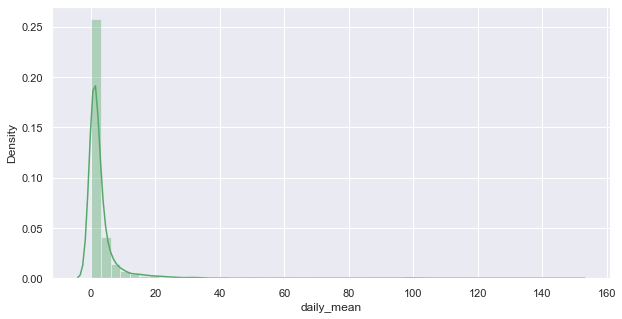

total misinformation:  11412
total users: 5364
total high frequency: 142 (2.6%)
proportion of misinformation sent by high frequency users: 13.8%
ME AJUDEM A COMPARTILHAR GENTE?

Pessoal entre nesse site e assinem a petição pública para nosso o execelentissimo presidente TSE a acatar o pedido de fiscalização de urnas através das Forças Armadas.

 Já temos quase 140.000!assinaturas no momento. Precisamos de 1 milhão!  Assine e convide seus amigos ! Leva apenas um minuto do seu tempo.
Eu já assinei!!!

Abaixo segue o link!

https://www.peticaopublica.com.br/pview.aspx?pi=BR107504
https://youtu.be/fWeObcSpupQ
🧐😣😩😫🤢🤮
https://youtu.be/vG7c0l8kGL0
Capitão ao vivo agora
http://www.diariorepublicano.com.br/noticia/1764/tse-rejeita-pedido-do-psol-para-censurar-whatsapp.html
Repudio esse atentado a Jair Bolsonaro e à democracia. É inadmissível em um País democrático essa intolerância política. Que Deus proteja Bolsonaro, sua família e seus eleitores. Torço pela sua rápida recuperação e espero uma

<ipython-input-28-d191e0035341>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
0,-3818310068976662355,1,4396,3742,0.851228,654,0.148772,24,0.005460,609,...,153,672588,153,3672,10,153,1530,0.002275,0.416667,0.600000
1,5782050016593913959,11,2332,972,0.416810,1360,0.583190,227,0.097341,363,...,1710,498161,1631,48057,58,1506,11907,0.024871,0.255507,0.745614
2,-2072140886659020977,3,2064,948,0.459302,1116,0.540698,243,0.117733,94,...,534,391490,534,46414,85,534,15800,0.041182,0.349794,0.651639
3,2839535797075678550,5,2020,1587,0.785644,433,0.214356,116,0.057426,258,...,895,644390,895,30154,25,866,6179,0.012376,0.215517,0.786325
4,170916900626840870,1,1810,828,0.457459,982,0.542541,111,0.061326,24,...,153,276930,153,16983,69,153,10557,0.038122,0.621622,0.383929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,-6130142672474558426,1,15,11,0.733333,4,0.266667,0,0.000000,0,...,270,4050,0,0,0,0,0,0.000000,0.000000,1.000000
2561,-6657806810163018843,1,14,14,1.000000,0,0.000000,0,0.000000,0,...,153,2142,0,0,0,0,0,0.000000,0.000000,1.000000
2566,4958314695072738102,1,14,14,1.000000,0,0.000000,0,0.000000,10,...,105,1470,0,0,0,0,0,0.000000,0.000000,1.000000
2588,-6076734346383138898,1,14,11,0.785714,3,0.214286,1,0.071429,0,...,306,4284,306,306,0,0,0,0.000000,0.000000,1.000000


In [53]:
df_time_bots, time_bots, time_bots_outlier = describe_group('daily_mean', 'high frequency', c = 'C2')
print_sample_messages(df_time_bots, sorting = 'number_of_messages', user=2, n_sample = 10)
df_time_bots

### Compare timeseries of most active users
* top influencer
* top propagandist
* top high frequency
* top midia sharers
* top user with no virals
* top user with no misinformation

In [46]:
def get_user_timeseries(user, frame = '24H'):
    df_user = df[df['id'] == user]
    messages_by_frame = df_user.groupby('timestamp').count()['id'].resample(frame).sum()
    return messages_by_frame

timeseries = get_user_timeseries(5782050016593913959)

In [48]:
print('top influencer')
fig = px.line(x=timeseries.index, y=timeseries.values)
fig.show()

top influencer


In [52]:
# stuart and students
# timeseries_stuart = df[df['autor_da_mensagem'] =='STUART'].groupby('timestamp').count()['remetente'].resample(frame).sum().to_frame()
# timeseries_users = df[df['autor_da_mensagem'] !='STUART'].groupby('timestamp').count()['remetente'].resample(frame).sum().to_frame()
# df_timeseries = pd.concat([timeseries_stuart,timeseries_users])
# df_timeseries['autor'] = ['STUART']*len(timeseries_stuart) + ['USUÁRIOS']*len(timeseries_users)
# df_timeseries.reset_index(level=0, inplace=True)

# print('Média de mensagens enviadas pelo STUART por dia:',timeseries_stuart.mean())
# print('Média de mensagens enviadas por alunos por dia:',timeseries_users.mean())

# fig = px.line(df_timeseries, x='timestamp', y='remetente',
#               color="autor", line_group="autor", hover_name="autor")
# fig.show()

# Misinformers

### Raw number of misinformation shared by active users

count    2633.000000
mean        4.136726
std        10.059828
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       147.000000
Name: misinformation, dtype: float64
outliers threshold:  17.0


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



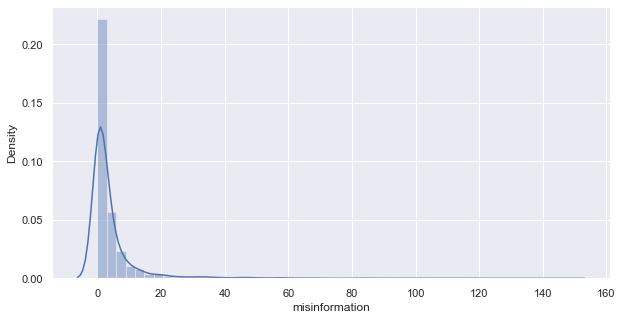

total misinformation:  11412
total users: 5364
total misinformers: 134 (2.5%)
proportion of misinformation sent by misinformers users: 43.6%
Vamos repetir novamente os adm não tem controle sobre o que é postado apenas removemos os que postam algo que não tem relação com o grupo
18:30
E vamos nos adicionando
✅😎👉🏽👉🏽
E hora de apoia o Bolsonaro nas ruas
*Ordem em meio a caos, o sucesso das escolas militares.*

_Curta_: *Direita Palmas-To*↪✅

https://m.facebook.com/story.php?story_fbid=286585758602603&id=166486373945876
Bora vira
Kkk
Por que para atrapalhar já tem dimais
😹😹😹😹


<ipython-input-28-d191e0035341>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,degree_centrality,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility
1,5782050016593913959,11,2332,972,0.416810,1360,0.583190,227,0.097341,363,...,1710,498161,1631,48057,58,1506,11907,0.024871,0.255507,0.745614
2,-2072140886659020977,3,2064,948,0.459302,1116,0.540698,243,0.117733,94,...,534,391490,534,46414,85,534,15800,0.041182,0.349794,0.651639
3,2839535797075678550,5,2020,1587,0.785644,433,0.214356,116,0.057426,258,...,895,644390,895,30154,25,866,6179,0.012376,0.215517,0.786325
4,170916900626840870,1,1810,828,0.457459,982,0.542541,111,0.061326,24,...,153,276930,153,16983,69,153,10557,0.038122,0.621622,0.383929
5,-6433788305811138375,1,1584,466,0.294192,1118,0.705808,193,0.121843,10,...,153,242352,153,29529,117,153,17901,0.073864,0.606218,0.396907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,-1838311250326952737,1,106,69,0.650943,37,0.349057,28,0.264151,3,...,153,16218,153,4284,21,153,3213,0.198113,0.750000,0.275862
680,-4001364801948757926,2,100,63,0.630000,37,0.370000,32,0.320000,18,...,122,5964,122,1912,18,122,1066,0.180000,0.562500,0.454545
707,-5270685105381125196,1,97,45,0.463918,52,0.536082,32,0.329897,2,...,27,2619,27,864,27,27,729,0.278351,0.843750,0.181818
756,-1667746819294183344,4,89,41,0.460674,48,0.539326,34,0.382022,24,...,681,15287,681,5769,30,681,5040,0.337079,0.882353,0.142857


In [54]:
df_misinformers, misinformers, misinformation_outlier = describe_group('misinformation', 'misinformers', c = 'C0')
print_sample_messages(df_misinformers, sorting = 'number_of_messages', user=2, n_sample = 10)
df_misinformers

### Correlations

In [66]:
df_users['misinformer'] = ['misinformer' if m in misinformers else 'non_misinformer' for m in df_users['id']]
df_active_users['misinformer'] = ['misinformer' if m in misinformers else 'non_misinformer' for m in df_active_users['id']]

<ipython-input-66-2ca3941697fc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
df_misinformers.columns

Index(['id', 'groups', 'number_of_messages', 'texts', 'text_ratio', 'midia',
       'midia_ratio', 'virals', 'viral_ratio', 'repeated_messages',
       'repeated_messages_ratio', 'days_active', 'daily_mean', 'daily_std',
       'daily_median', 'daily_95', 'daily_outliers', 'degree_centrality',
       'strenght', 'viral_degree_centrality', 'viral_strenght',
       'misinformation', 'misinformation_degree_centrality',
       'misinformation_strenght', 'misinformation_ratio',
       'viral_misinformation_ratio', 'credibility'],
      dtype='object')

raw


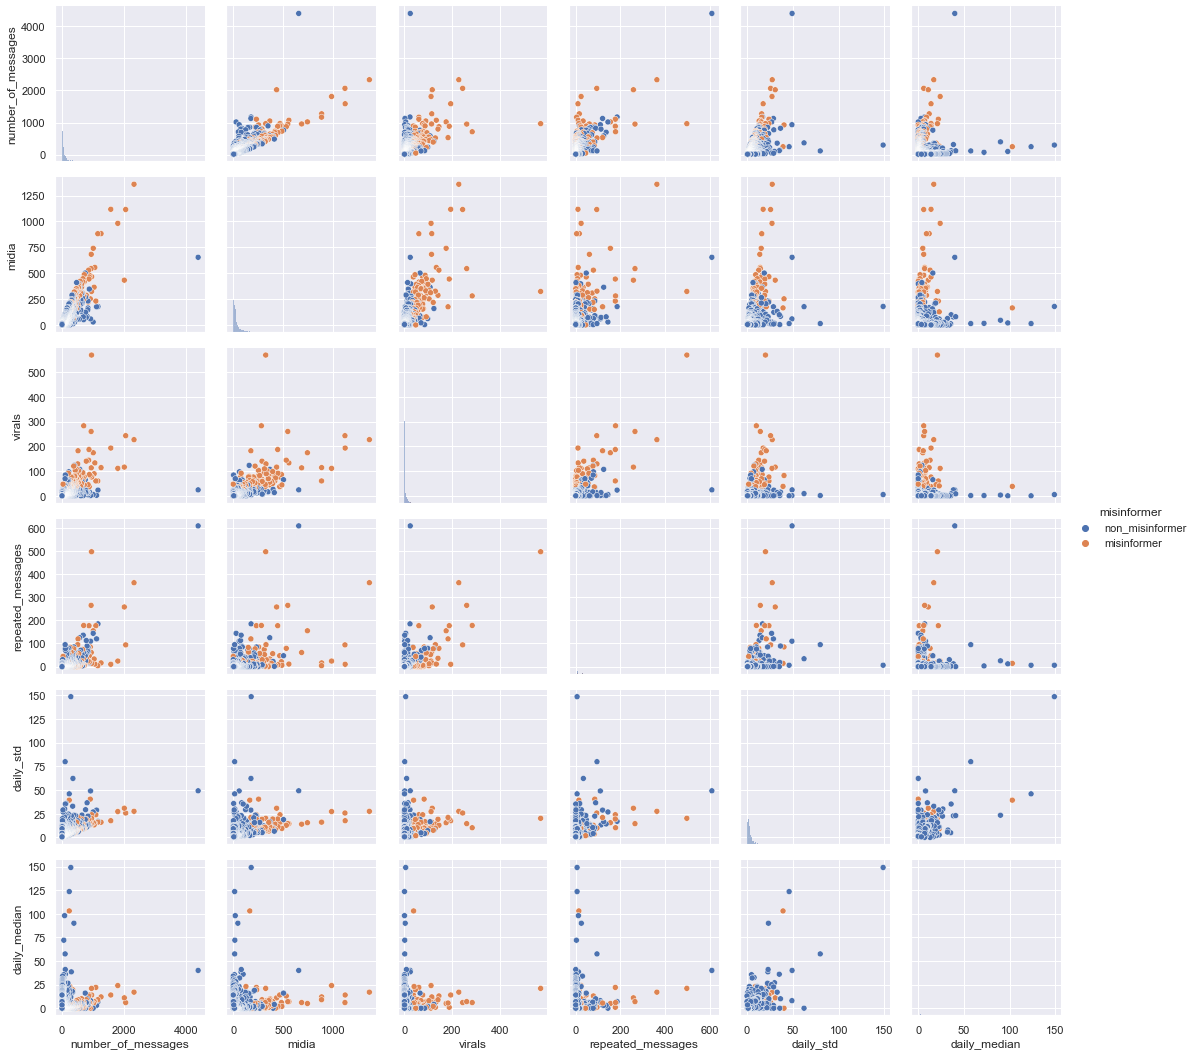

In [72]:
print('raw')
g = sns.PairGrid(df_active_users[['number_of_messages', 'midia', 'virals', 'repeated_messages',
                                  'daily_std', 'daily_median','misinformer']], 
                 hue = 'misinformer')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

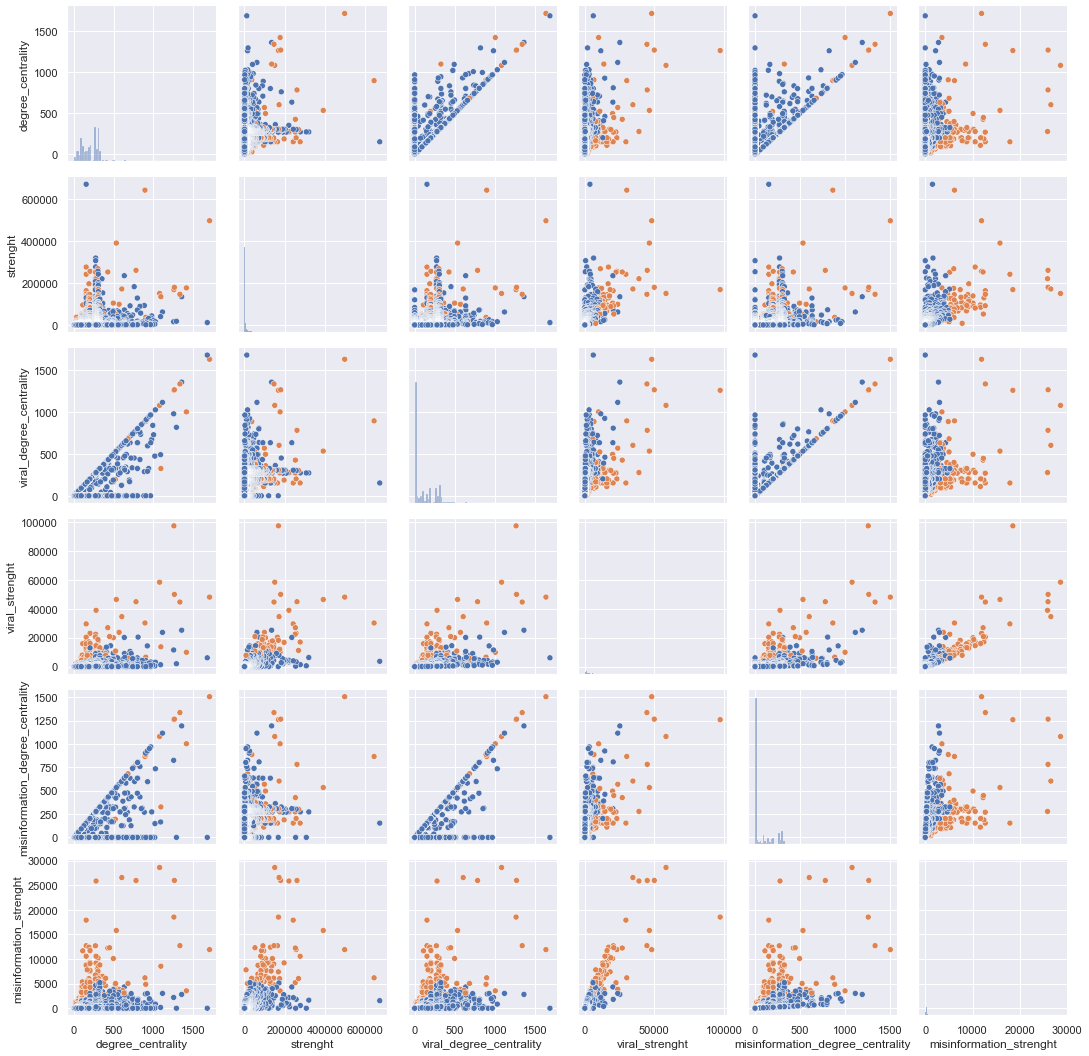

In [60]:
print('graph')
g = sns.PairGrid(df_users[['degree_centrality', 'strenght','viral_degree_centrality', 'viral_strenght', 
                           'misinformation_degree_centrality', 'misinformation_strenght',
                           'misinformer']], hue = 'misinformer')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Anoter definition of misinformers based on graph features (strenght of connections): superspreaders

count     2633.000000
mean       756.490315
std       1915.113345
min          0.000000
25%          0.000000
50%        210.000000
75%        652.000000
max      28601.000000
Name: misinformation_strenght, dtype: float64
outliers threshold:  3333.6000000000004


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



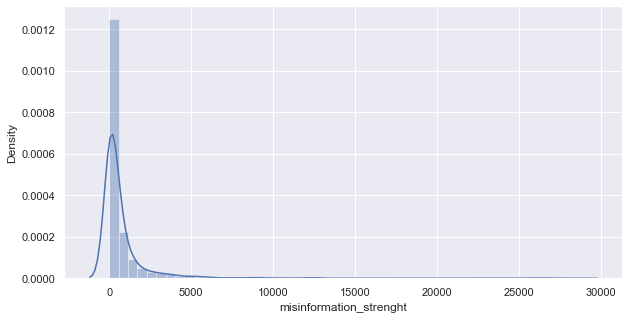

total misinformation:  11412
total users: 5364
total superspreaders: 132 (2.5%)
proportion of misinformation sent by superspreaders users: 39.7%
https://youtu.be/Q08XygQRkA8
Alguém ainda tem dúvidas em quem votar?
Última entrevista de BOLSONARO antes de sofrer o atentado. 
Veja o que ele diz.🇧🇷
Flavio consiga uma camiseta mito  GG para mim .
Olá,
Eu assinei uma petição para Administração Pública que diz:
"Retirada da UFRJ da Administração do Palácio Imperial da Quinta da Boa Vista"
Você gostaria de assinar esta petição? Clique aqui:
http://www.citizengo.org/pt-pt/165504-retirada-da-ufrj-da-administracao-do-palacio-imperial-da-quinta-da-boa-vista?tc=wp&tcid=50712566
Muito obrigado!


<ipython-input-28-d191e0035341>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,groups,number_of_messages,texts,text_ratio,midia,midia_ratio,virals,viral_ratio,repeated_messages,...,strenght,viral_degree_centrality,viral_strenght,misinformation,misinformation_degree_centrality,misinformation_strenght,misinformation_ratio,viral_misinformation_ratio,credibility,misinformer
24,2878545449163323727,3,883,439,0.497169,444,0.502831,187,0.211778,177,...,172068,603,34560,147,603,26559,0.166478,0.786096,0.218085,misinformer
39,-5426274422942733548,6,712,431,0.605337,281,0.394663,283,0.397472,178,...,150659,1080,58364,141,1080,28601,0.198034,0.498233,0.503521,misinformer
18,-4365731339186281047,7,951,406,0.426919,545,0.573081,260,0.273396,265,...,180079,1266,49941,135,1266,25971,0.141956,0.519231,0.482759,misinformer
5,-6433788305811138375,1,1584,466,0.294192,1118,0.705808,193,0.121843,10,...,242352,153,29529,117,153,17901,0.073864,0.606218,0.396907,misinformer
16,-9166534760459654877,8,964,640,0.663900,324,0.336100,569,0.590249,497,...,169073,1260,97306,111,1260,18523,0.115145,0.195079,0.805263,misinformer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,4663145275462981855,1,356,229,0.643258,127,0.356742,31,0.087079,4,...,108936,306,9486,12,306,3672,0.033708,0.387097,0.625000,non_misinformer
429,8038726262758897273,1,155,47,0.303226,108,0.696774,18,0.116129,0,...,47430,306,5508,11,306,3366,0.070968,0.611111,0.421053,non_misinformer
413,-6449133970849284306,1,160,41,0.256250,119,0.743750,14,0.087500,0,...,52160,326,4564,11,326,3586,0.068750,0.785714,0.266667,non_misinformer
234,-8683522735082230313,1,253,169,0.667984,84,0.332016,17,0.067194,1,...,77924,308,5236,11,308,3388,0.043478,0.647059,0.388889,non_misinformer


In [73]:
df_superspreaders, superspreaders, misinformation_strenght_outlier = describe_group('misinformation_strenght', 'superspreaders', c = 'C0')
print_sample_messages(df_superspreaders, sorting = 'misinformation', user=1, n_sample = 5)
df_superspreaders

In [74]:
df_users['superspreader'] = ['superspreader' if m in superspreaders else 'non_superspreader' for m in df_users['id']]
df_active_users['superspreader'] = ['superspreader' if m in superspreaders else 'non_superspreader' for m in df_active_users['id']]

<ipython-input-74-d9fa728e7ebb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Correlations

raw


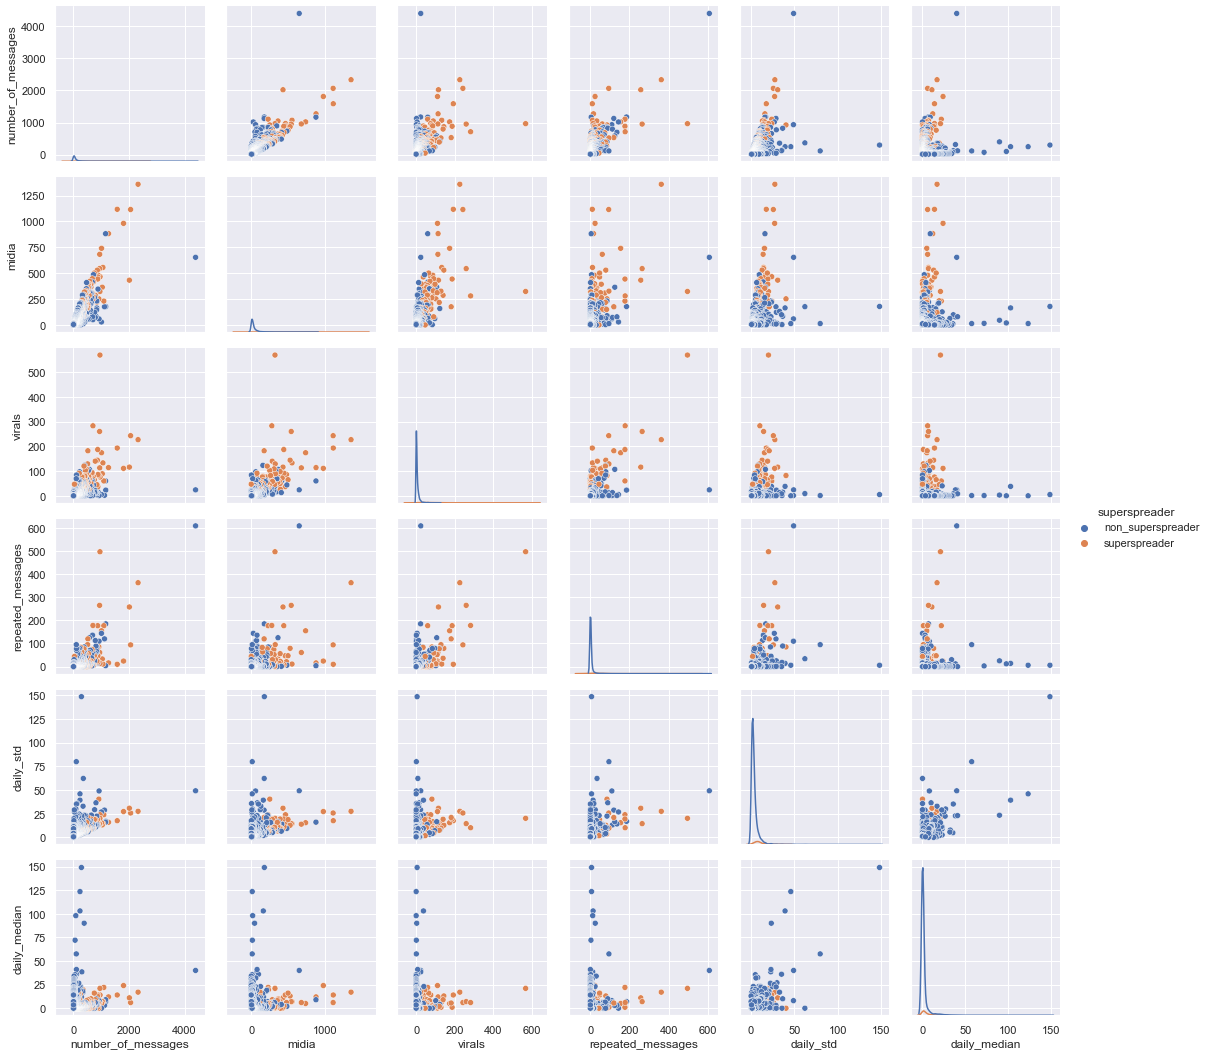

In [78]:
print('raw')
g = sns.PairGrid(df_active_users[['number_of_messages', 'midia', 'virals', 'repeated_messages',
                                  'daily_std', 'daily_median','superspreader']], 
                 hue = 'superspreader')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

graph


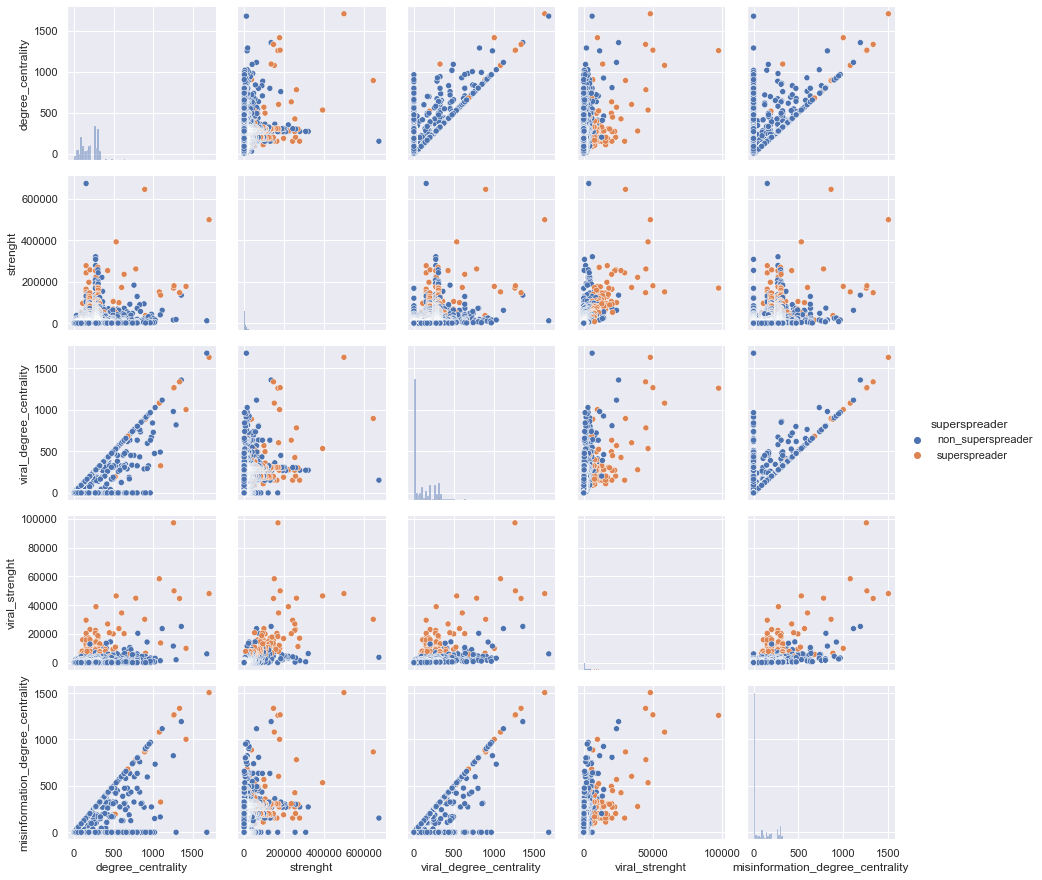

In [77]:
print('graph')
g = sns.PairGrid(df_users[['degree_centrality', 'strenght','viral_degree_centrality', 'viral_strenght', 
                           'misinformation_degree_centrality',
                           'superspreader']], hue = 'superspreader')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Intersection between groups
* most_active (post a lot of messages) **maybe change names?**
* influencers (highly connected - )
* propagandists (post abnormal quantity of viral messages - viral ratio or **virals**?)
* midia_sharers (post abnormal quantity of midia - midia ratio)
* misinformers (post abnormal quantity of misinformation)
* superspreaders (abnormal quantity of reach of misinformation)

In [ ]:
propagandists
midia_sharers



In [ ]:
total_bots = bots.union(midia_bots)
print('intersection between misinformers and propagandists (possible bots)')
print('total misinformers:',len(misinformers))
print('total possible bots:',len(total_bots))
insection_mis_pro = misinformers.intersection(total_bots)
print('intersection:', len(insection_mis_pro))
print('about {a:.1f}% of misinformers are possible bots'.format(a=100*len(insection_mis_pro)/len(misinformers)))
print('about {a:.1f}% of possible bots are misinformers'.format(a=100*len(insection_mis_pro)/len(total_bots)))

In [ ]:
total_bots = bots.union(midia_bots)
print('intersection between misinformers and influencers')
print('total misinformers:',len(misinformers))
print('total influencers:',len(influencers))
insection_mis_inf = misinformers.intersection(influencers)
print('intersection:', len(insection_mis_inf))
print('about {a:.1f}% of misinformers are influencers'.format(a=100*len(insection_mis_inf)/len(misinformers)))
print('about {a:.1f}% of influencers are misinformers'.format(a=100*len(insection_mis_inf)/len(influencers)))

In [ ]:
total_bots = bots.union(midia_bots)
print('intersection between misinformers and influencers misinformers')
print('total misinformers:',len(misinformers))
print('total influencers misinformers:',len(str_misinformers))
insection_mis_str = misinformers.intersection(str_misinformers)
print('intersection:', len(insection_mis_str))
print('about {a:.1f}% of misinformers are influencers misinformers'.format(a=100*len(insection_mis_str)/len(misinformers)))
print('about {a:.1f}% of influencers misinformers are misinformers'.format(a=100*len(insection_mis_str)/len(str_misinformers)))

# Detection of misinformers

In [ ]:
y = np.array([1 if m == 'misinformer' else 0 for m in df_users['misinformer']])

def print_class_balance(y):
    pos_mask = y == 1 
    pos = y[pos_mask]
    neg_mask = y == 0 
    neg = y[neg_mask]
    values = [pos.shape[0],neg.shape[0]]
    keys = ['misinformer', 'non-misinformer']
    g = sns.barplot(x = keys, y = values)
    for p in g.patches:
        g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 5), textcoords = 'offset points')
        
print_class_balance(y)

## Rules
* number of virals equal or higher than misinformation outlier

In [ ]:
df_misinformers[df_misinformers.columns[1:]].describe()